In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
class_names=["Tshirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
model=keras.Sequential([
    layers.Reshape((28,28,1),input_shape=(28,28)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(6,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

C:\Users\Menka khandare\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [9]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7026 - loss: 0.8080 - val_accuracy: 0.8294 - val_loss: 0.4708
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8462 - loss: 0.4281 - val_accuracy: 0.8607 - val_loss: 0.3876
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8687 - loss: 0.3628 - val_accuracy: 0.8717 - val_loss: 0.3516
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8790 - loss: 0.3310 - val_accuracy: 0.8837 - val_loss: 0.3316
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8841 - loss: 0.3133 - val_accuracy: 0.8813 - val_loss: 0.3258
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8915 - loss: 0.2947 - val_accuracy: 0.8940 - val_loss: 0.2910
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8985 - loss: 0.2744 - val_accuracy: 0.8929 - val_loss: 0.2937
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9004 - loss: 0

In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8838 - loss: 0.3233
accuracy: 0.8850


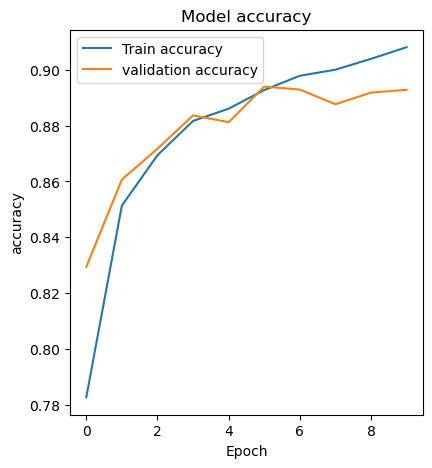

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Train accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()

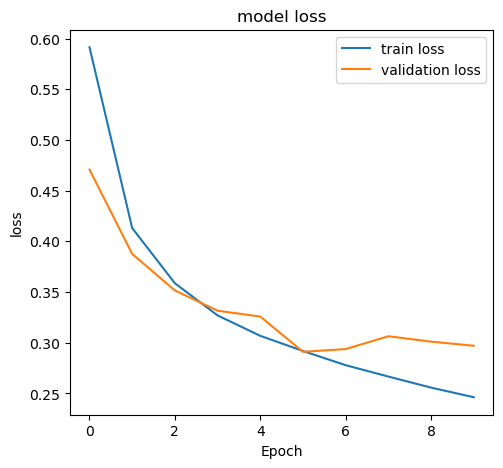

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="train loss")
plt.plot(history.history['val_loss'],label="validation loss")
plt.title("model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()

In [18]:
predictions=model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


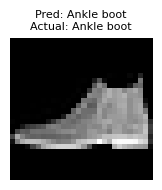

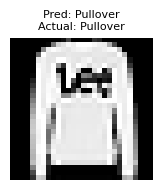

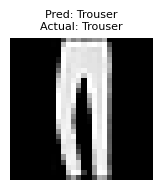

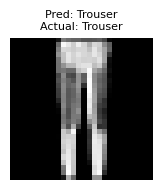

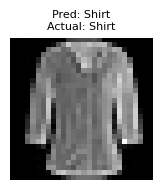

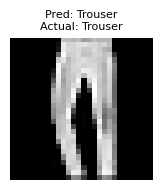

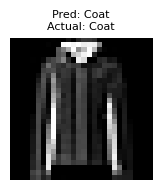

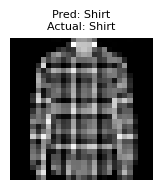

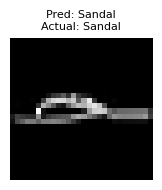

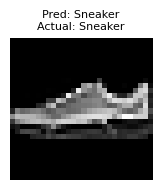

In [22]:
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i],cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[y_test[i]]}", fontsize=8)
    plt.axis("off")
    plt.tight_layout()
    plt.show()